In [1]:
# install github clone - allows for easy cloning of subdirectories
!pip install github-clone
from pathlib import Path 

# clone datasets
if not Path('chapter_8_datasets').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_datasets
else:
    print('chapter_8_datasets already cloned!')

# clone library subdirectory
if not Path('chapter_8_library').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_library
else:
    print('chapter_8_library already cloned!')

# clone images
if not Path('chapter_8_images').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_images
else:
    print('chapter_8_images already cloned!')

# clone videos
if not Path('chapter_8_videos').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_videos
else:
    print('chapter_8_videos already cloned!')

## run universally whether in collab or local ##
# append path for local library, data, and image import
import sys
sys.path.append('./chapter_8_library') 
sys.path.append('./chapter_8_images') 
sys.path.append('./chapter_8_datasets') 

# import section helper
import section_8_3_helpers

# dataset paths
dataset_path_1 = 'chapter_8_datasets/2d_span_data.csv'
dataset_path_2 = 'chapter_8_datasets/3d_span_data.csv'

# image paths
image_path_1 = "chapter_8_images/pca_classic.png"
image_path_2 = "chapter_8_images/Fig_9_7.png"

# standard imports
import matplotlib.pyplot as plt
from IPython.display import Image
import autograd.numpy as np
from matplotlib import gridspec

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=0df0a2fe55d5c4c640c88a80e6eee191370473ed59eb5f8e692b1213c26ba026
  Stored in directory: /Users/devmody/Library/Caches/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
Cloning into 'chapter_8_datasets'...
done.
Cloning into 'chapter_8_library'...
done.
Cloning into 'chapter_8_images'...
done.
Cloning into 'chapter_8_videos'...
done.


In [3]:
# here the weight matrices are loaded in a single list w = [C,W]
def least_squares(w):  
    # strip off C and W parameters
    C = w[0]
    W = w[1]
    
    # compute the least squares cost
    cost = np.sum((np.dot(C,W) - X)**2)
    return cost/float(X.shape[1])

In [ ]:
# load in dataset
X_original = np.loadtxt(dataset_path_2,delimiter=',')

# center data
X_means = np.mean(X_original,axis=1)[:,np.newaxis]
X = X_original - X_means

# run gradient descent to minimize the Least Squares cost for linear regression
g = least_squares; 
max_its = 100; 
alpha_choice = 10**(0);

# set up initialization
scale = 0.1;
C = scale*np.random.randn(3,2)
W = scale*np.random.randn(2,100)
w = [C,W]

# run gradient descent
weight_history,cost_history = section_8_3_helpers.gradient_descent(g,alpha_choice,max_its,w)

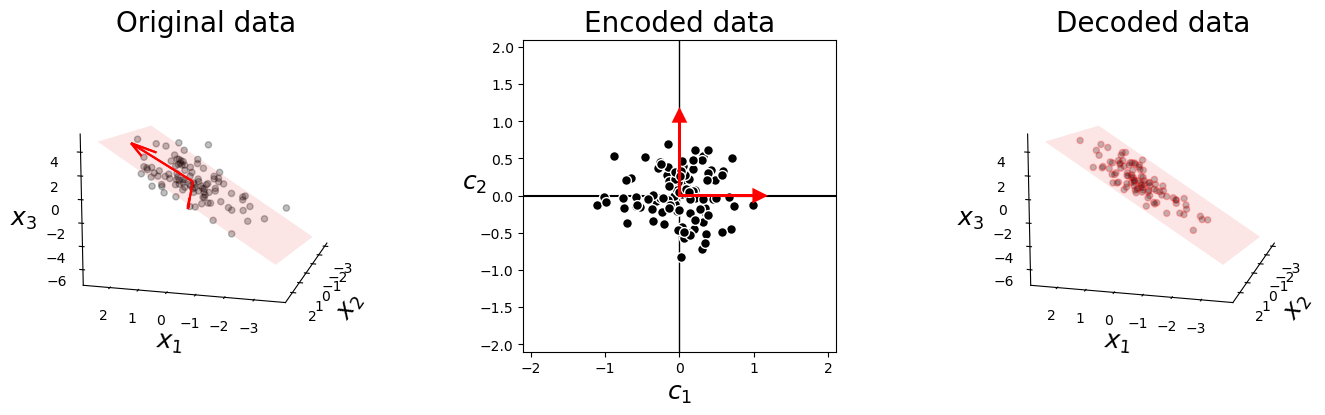

In [5]:
# produce visuals
C = weight_history[-1][0]
view = [15,105]
section_8_3_helpers.project_data_from_3d_to_2d(X,C,view)